## **Linear Regression & Regularization**

Boston Housing Data

Kaglle: https://www.kaggle.com/datasets/altavish/boston-housing-dataset/data

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## **Exploratory Data Analysis**

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Whether there are missing values?
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
# Mean Imputation
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

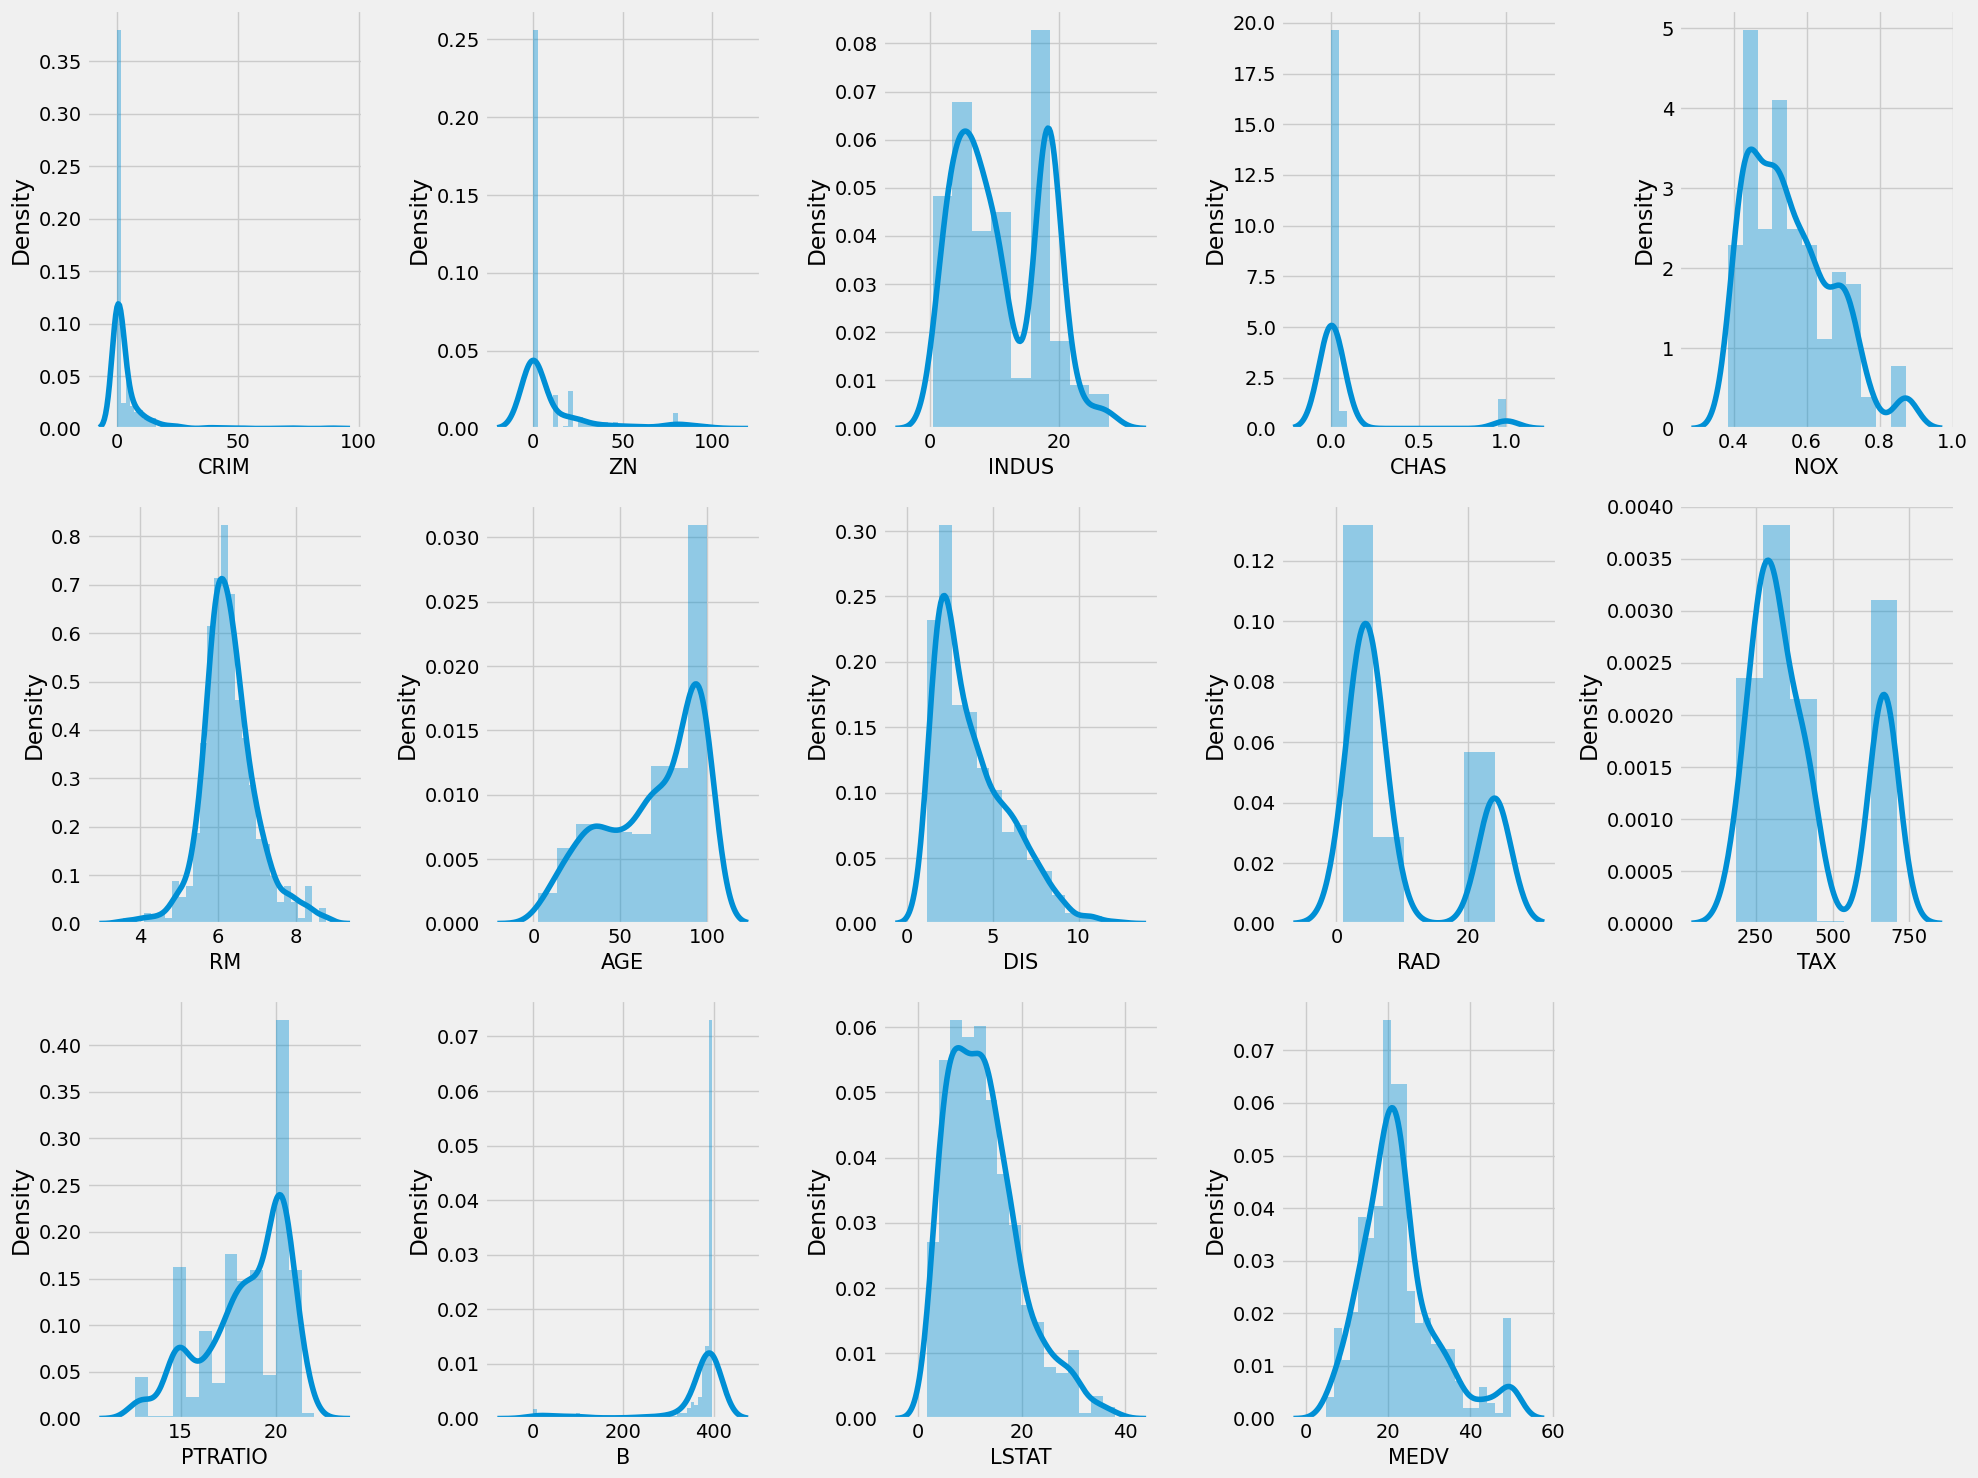

In [ ]:
# Plot histograms for numerical variables
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

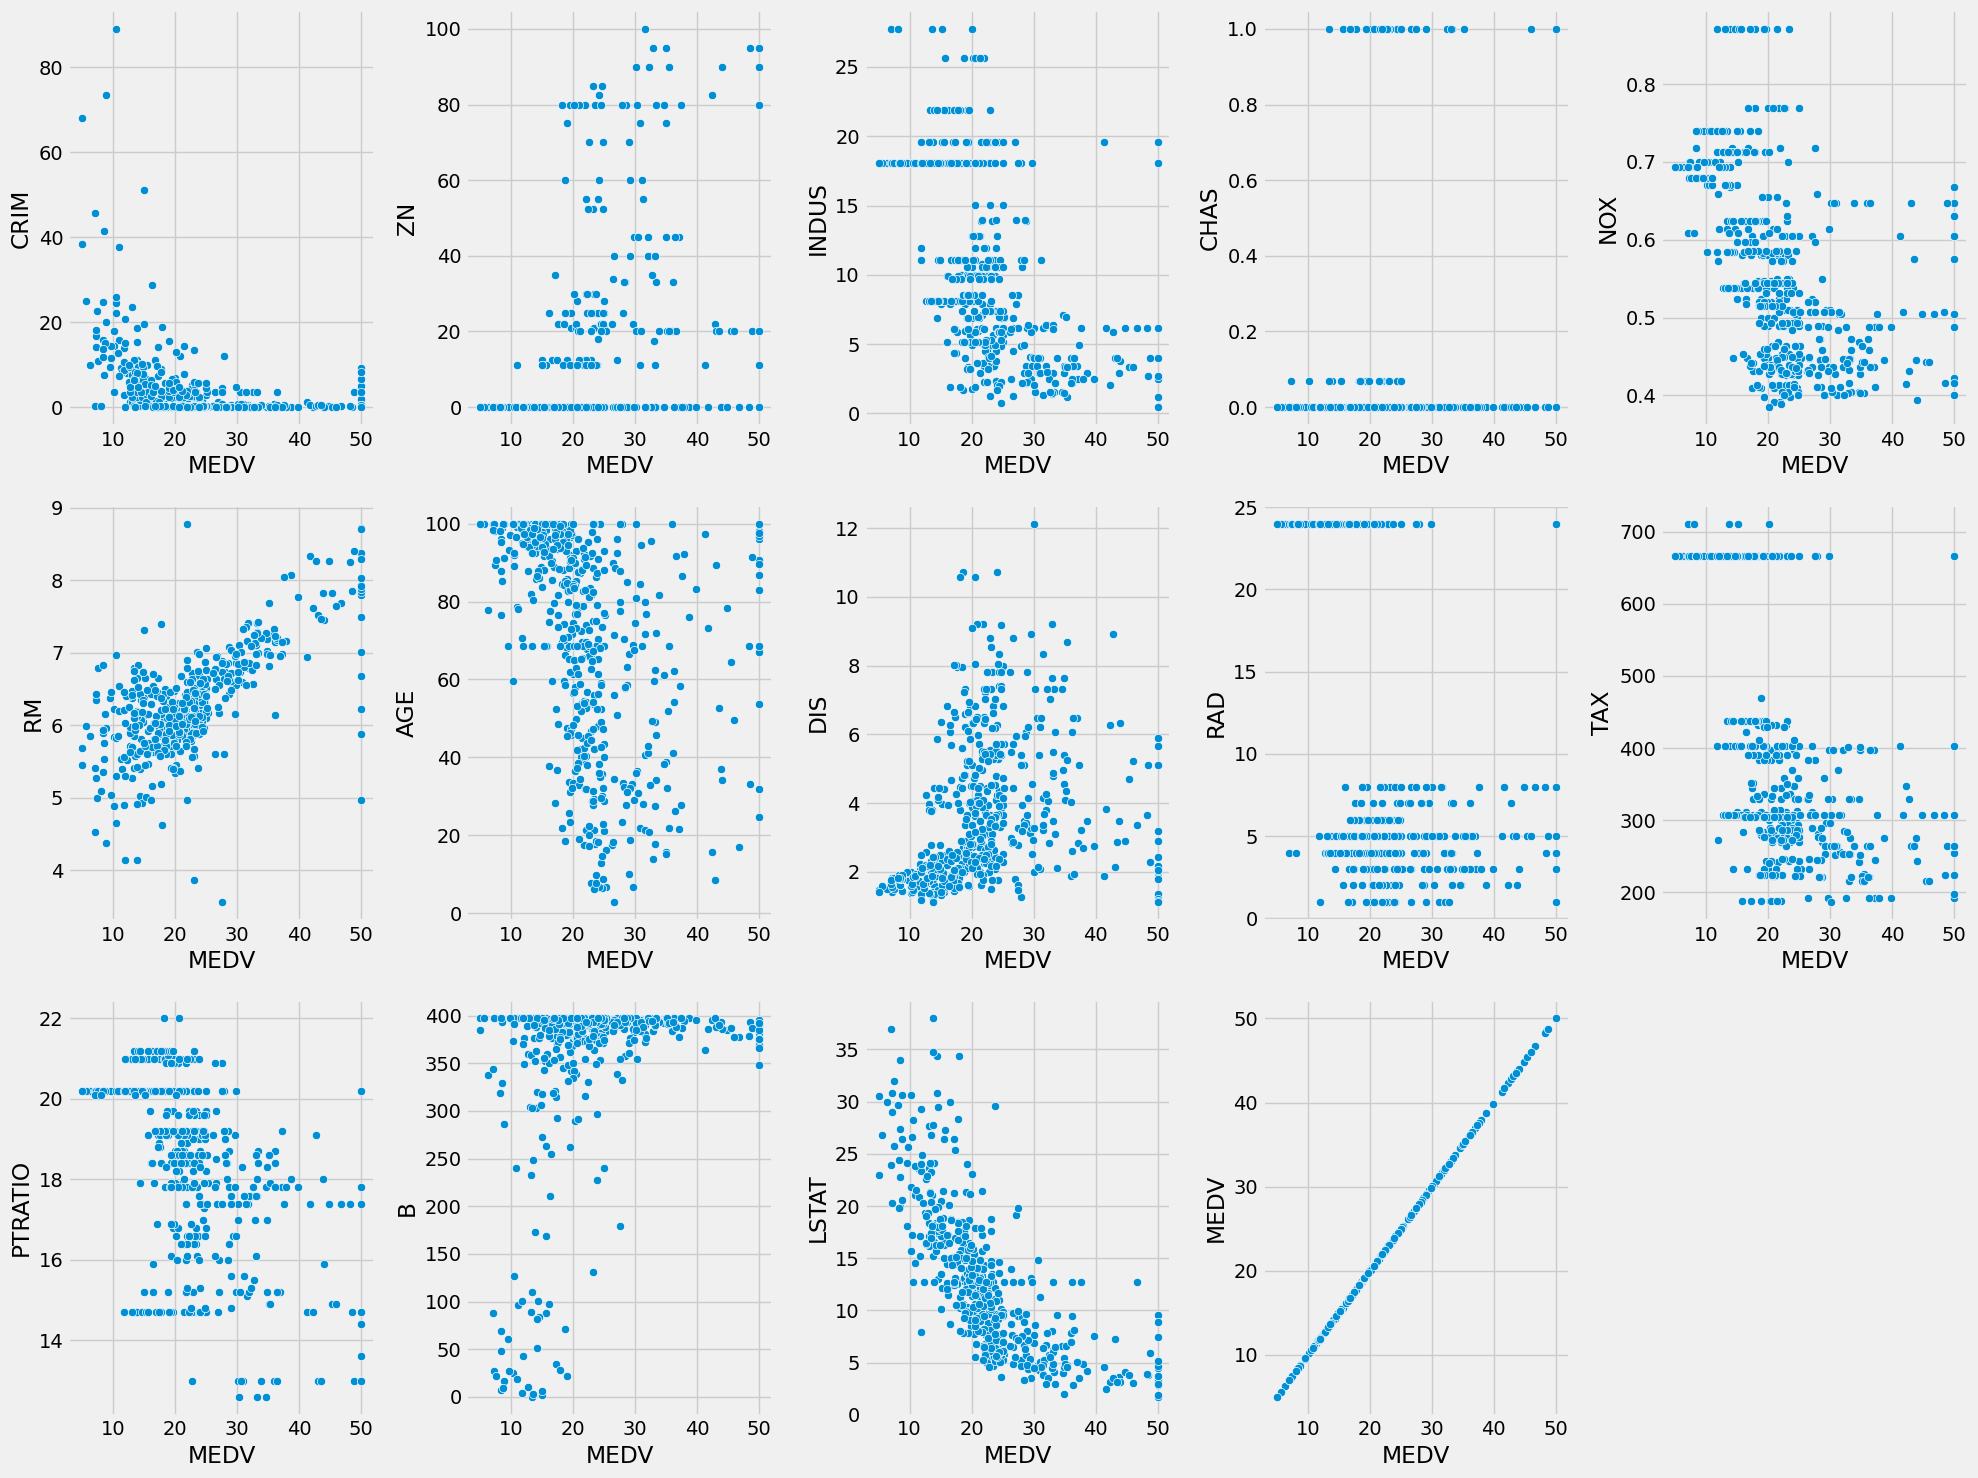

In [ ]:
# Making a scatter plot using `Price` and remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])

    plotnumber += 1

plt.tight_layout()
plt.show()

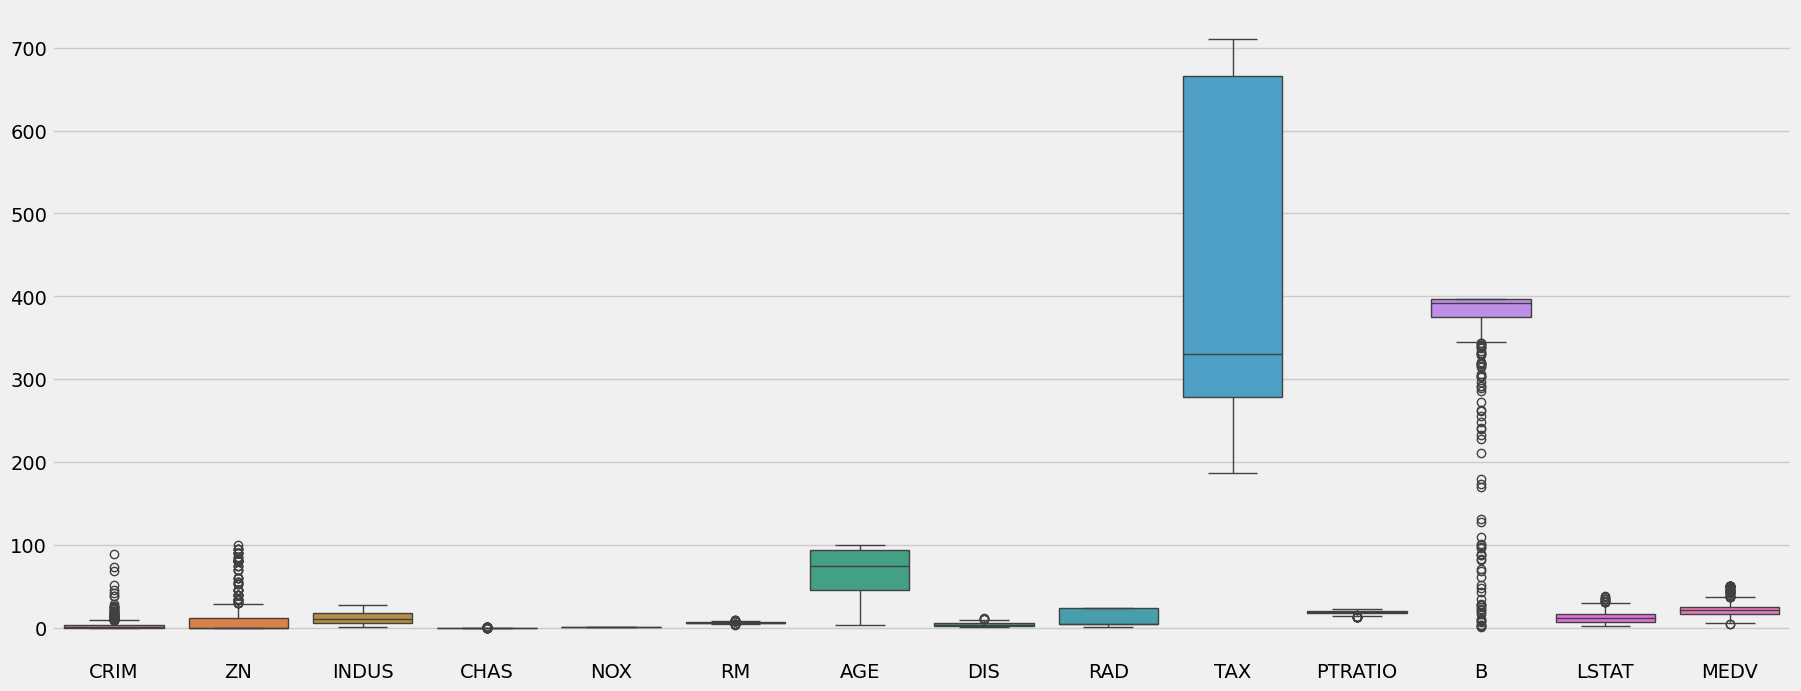

In [ ]:
# looking for outliers using box plot
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

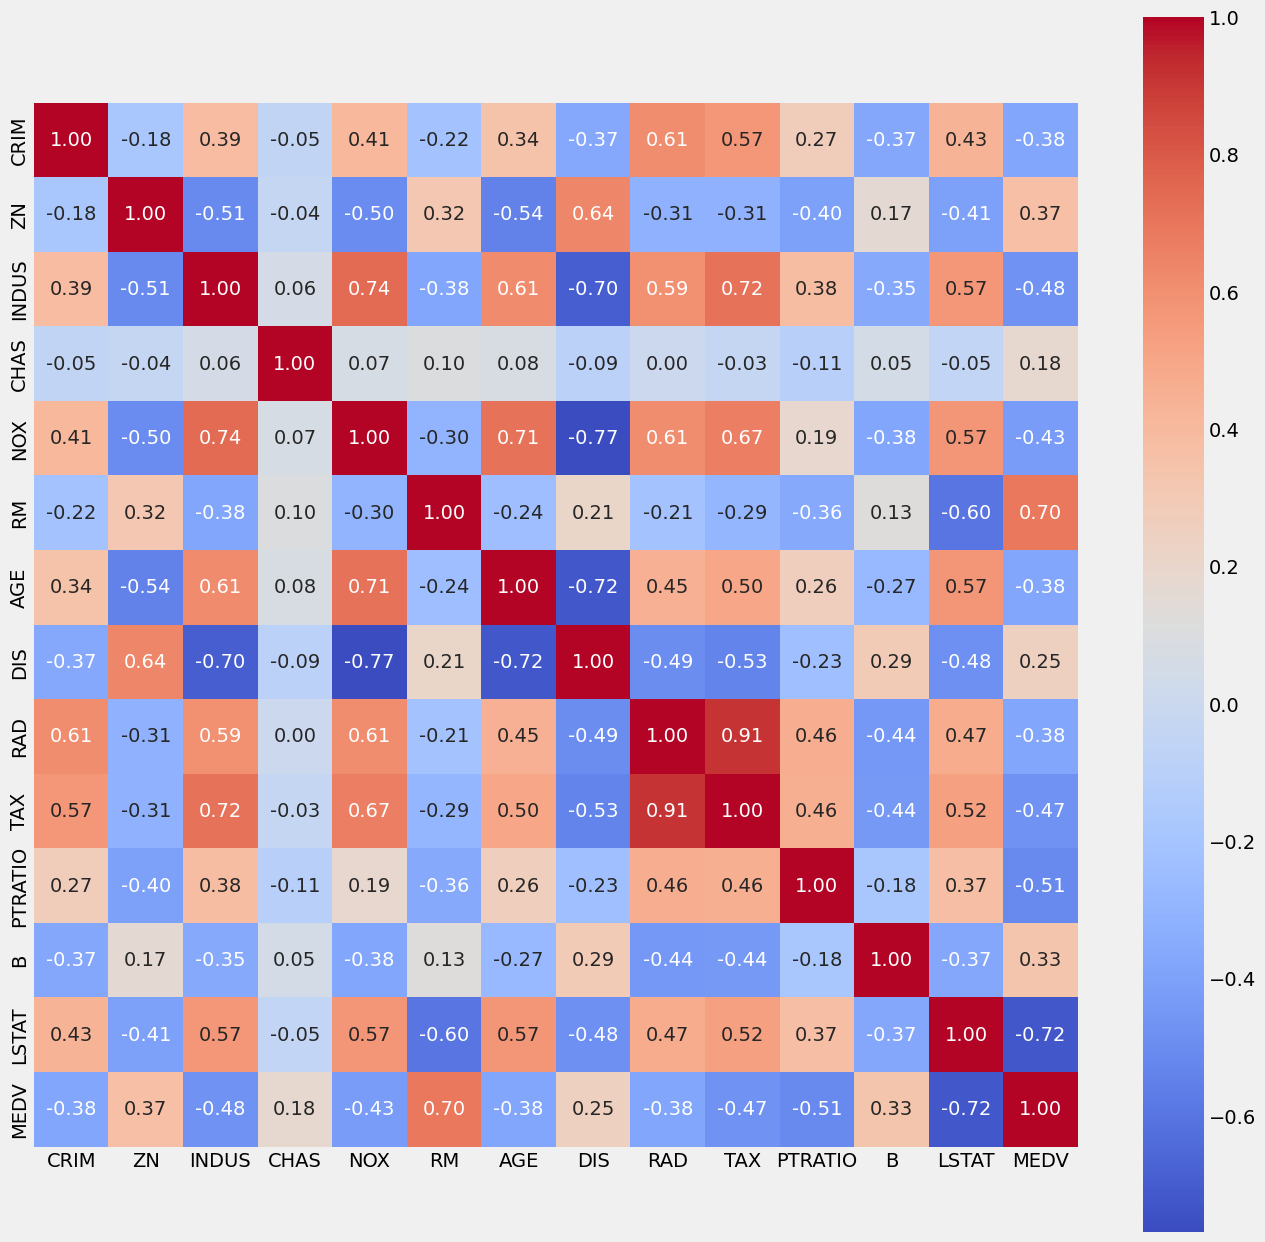

In [ ]:
# Heatmap: Check out the correlations between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt= '.2f', square=True, cmap='coolwarm')
plt.show()

There is likely to be a multicollinearity between 'RAD' and 'TAX. We'd better eliminate one of them.

In [ ]:
# creating features and label variable
X = df.drop(columns = ['MEDV','RAD'], axis = 1)
y = df['MEDV']

## **Linear Regression**

In [ ]:
# Splitting the original data into train and test data sets
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    X, y, random_state=42
)

In [ ]:
# Using Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train the model and check the score of it
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))

0.7326854666092947


In [ ]:
# Check the score of the test data
print(lr.score(test_input, test_target))

0.6585755356199967


In [ ]:
# The linear regression model is underfitting the training data because the score is low
# We can add quadratic terms into the data by using column_stack() in order to increase the score
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(379, 24) (127, 24)


In [ ]:
# Train the model by using the updated data and check the score of it
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.8157873706051824


In [ ]:
# It seems that the model is underfitting the training data.
# Then, check the score of the test data set
print(lr.score(test_poly, test_target))

0.7897597567404928


In [ ]:
# Find coefficient and intercept
print(lr.coef_, lr.intercept_)

[ 1.29887728e-03 -1.46419590e-06 -2.59200065e-03  2.40427384e+01
 -2.31882490e+01  1.95836490e+00  8.68253402e-05  1.31096188e-01
  4.25858988e-05  6.06417759e-02 -4.97810117e-05  1.83977835e-02
 -2.43423011e-01 -4.99168981e-03  1.60390490e-02 -2.07734764e+01
  1.38131621e+01 -2.14191178e+01 -3.51755454e-02 -2.35526389e+00
 -3.68134302e-02 -2.87688891e+00  3.08783943e-02 -1.15339024e+00] 133.26970783377698


## **Regularization**
Instead of linear regression, we can try using regularization methods like Ridge or LASSO. We need to scale data before using Ridge.

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
# Train the Ridge model and check the score of the train data
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.8103543406807027


In [ ]:
# Check the score of the test data
print(ridge.score(test_scaled, test_target))

0.7786027751081626


In [ ]:
# It seems that the ridge model is underfitting the train data
# Find the most appropriate hyper parameter
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # Create a ridge model
  ridge = Ridge(alpha=alpha)
  # Train the ridge model
  ridge.fit(train_scaled, train_target)
  # Save scores of train and test data sets
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

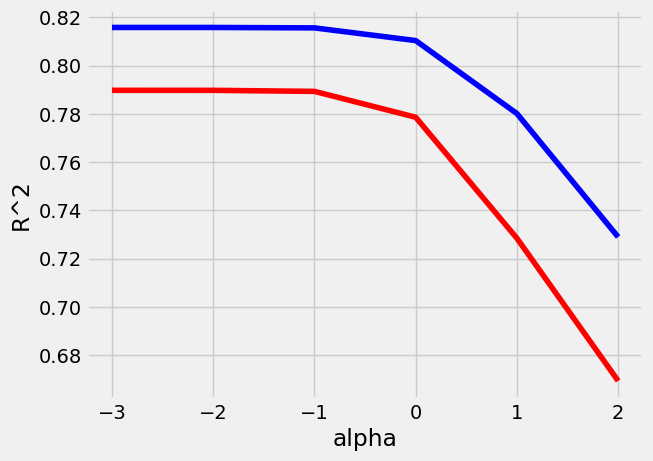

In [ ]:
# Plot scores. For this, we need to transform X values into common log values
plt.plot(np.log10(alpha_list), train_score, c='blue')
plt.plot(np.log10(alpha_list), test_score, c='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# The optimal value is -1, in other word, alpha = 10^(-1) = 0.1
# Train the model with this value again.
ridge = Ridge(alpha=0.1)
ridge.fit(train_poly, train_target)
print(ridge.score(train_poly, train_target))
print(ridge.score(test_poly, test_target))

0.8149647811792847
0.7922327933546999


In [ ]:
# We can just see small improvement on the score of the test data.
# Instead, we are going to use LASSO model.

## **LASSO model**

In [ ]:
# Use Lasso model
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.6893274950259464


In [ ]:
# Check the score of the test data
print(lasso.score(test_scaled, test_target))

0.6503711277519625


In [ ]:
# Find the most appropriate tuning parameter in the LASSO model
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # Create a LASSO model
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # Train the model
  lasso.fit(train_scaled, train_target)
  # Save scores of train and test data
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

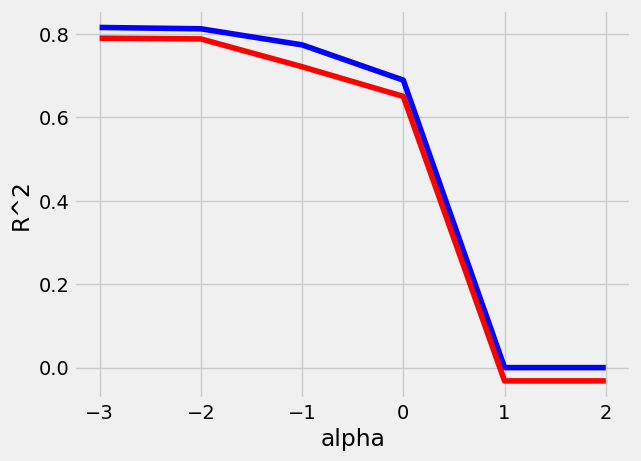

In [ ]:
# Plot train_score and test_score
plt.plot(np.log10(alpha_list), train_score, c='blue')
plt.plot(np.log10(alpha_list), test_score, c='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# Lasso 모델에서 최적의 alpha값은 -3, 즉 10^(-3)=0.001입니다.
# alpha=0.001으로 Lasso 모델을 다시 훈련합니다
lasso = Lasso(alpha=0.001)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.8156945656058912
0.7897519516146005


In [ ]:
# Lasso 모델에서 계수가 0인 paramet의 갯수를 확인합니다.
print(np.sum(lasso.coef_ == 0))

0
